This notebook details how I make the call directionality function taken from Giuggioli et al. 2015.

In [8]:
import matplotlib.pyplot as plt 
plt.rcParams['agg.path.chunksize'] = 10000
import pandas as pd
import numpy as np 

In [3]:
from the_cocktail_party_nightmare_MC import call_directionality_factor 

### 1: Let's get th call directionality function as per Giuggioli et al. 2015:

In [20]:
# the Asymmetry parameter used to specify the shape of the call directionality function
A = 7.0 
angles = np.linspace(0, 2*np.pi,50)

directionality_factor = []
for angle in angles:
    directionality_factor.append( call_directionality_factor(A, angle))
    

### 2: Let's generate the temporal masking function :

In [21]:
masking_dataset = pd.DataFrame()
masking_dataset['timegap_ms'] = np.array([-0.65,0,3,6,12,24])
masking_dataset['dB_leveldiff'] = np.array([-22,-8,-17,-23,-29,-34])


new_timegaps = np.linspace(25,-1,100)
interp_dBleveldiff = np.interp(new_timegaps,masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'])
#plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'*-',linewidth=10,alpha=0.3,markersize=20,
#        label='Original data')
#plt.plot(new_timegaps,interp_dBleveldiff,'*-',label='Interpolated data')

### 3: Let's generate the spatial unmasking function:

In [22]:
fig4b = pd.read_csv('data/Suemer_et_al_2009_fig4b.csv')
fig4b['deltaTS_thickwire'] = fig4b['target_strength'] - fig4b['target_strength'][0] # the different in target strength from 
# the original 1.2 mm wire 

fig4b['delta_level'] = fig4b['deltaTS_thickwire'] - 22.3


#calculate polynomial fit
P= np.polyfit(fig4b['masker_angle'],fig4b['delta_level'],2)
ts_pred = np.polyval(P,fig4b['masker_angle'])
fit_error = fig4b['delta_level']-ts_pred




## set the values as separate columns
fig4b['quad_fit'] = ts_pred
fig4b['quad_release'] = ts_pred-ts_pred[0]

# create a new interpolated set of spatial release vs angular separation values:
theta_sep = np.linspace(0,23,50)
deltaecholevel = np.polyval(P,theta_sep)
deltaecholevel += -deltaecholevel[0]

spatial_release_fn = pd.DataFrame(index =range(deltaecholevel.size),columns=['deltatheta','dB_release'])
spatial_release_fn['deltatheta'] = theta_sep
spatial_release_fn['dB_release'] = deltaecholevel


In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


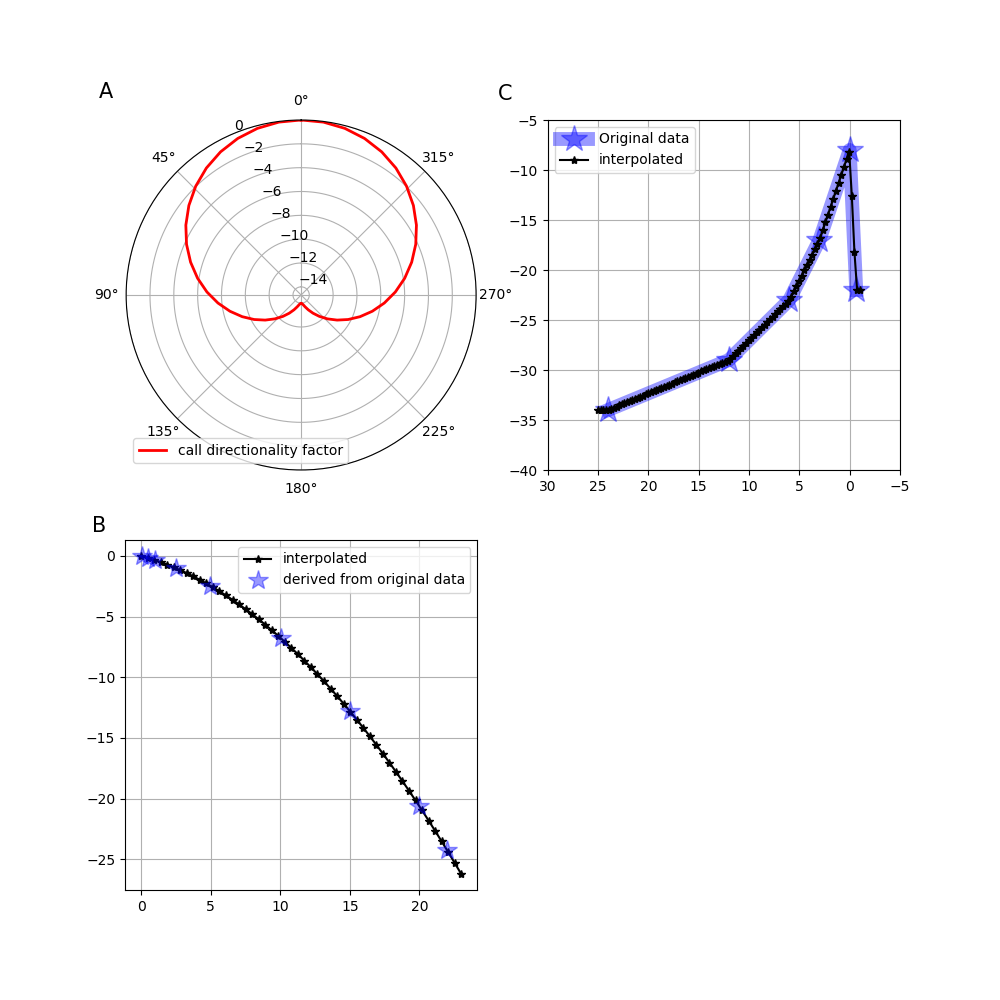

Text(-3.5,2,'B')

In [80]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(221, polar=True)
ax.plot(angles, directionality_factor, color='r', linewidth=2, label='call directionality factor')
ax.set_theta_zero_location('N')
plt.legend()
plt.text(0.8, 9,'A',fontsize=15)

ax1 = plt.subplot(222)
plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'b*-',linewidth=10,alpha=0.4,markersize=20,
        label='Original data')
plt.plot(new_timegaps,interp_dBleveldiff,'k*-',label='interpolated')
plt.xlim(30,-5);plt.grid(); plt.ylim(-40,-5)
plt.legend()
plt.text(35, -3,'C',fontsize=15)


ax2 = plt.subplot(223)
plt.plot(theta_sep,deltaecholevel,'k*-', label='interpolated') ;
plt.plot(fig4b['masker_angle'],fig4b['quad_release'],'b*',markersize=15,alpha=0.4, label='derived from original data')
plt.grid()
plt.legend()
plt.text(-3.5, 2,'B',fontsize=15)
